In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [87]:
train_df = pd.read_json("train.json.zip")
test_df = pd.read_json("test.json.zip")
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [278]:
#No missing values
# print("Missing values for Training data")
# print(train_df.isnull().sum())

# print('\n')

# print("Mission values for Test data")
# print(test_df.isnull().sum())

#missing data in the features
#print (train_df[train_df['features'].apply(len) == 0])
print ("The number of missing data in features is", len(train_df[train_df['features'].apply(len) == 0]))

The number of missing data in features is 3218


In [4]:
# print("Information of training data:")
# print(train_df.info())

# print('\n')

# print("Information of test data:")
# print(test_df.info())

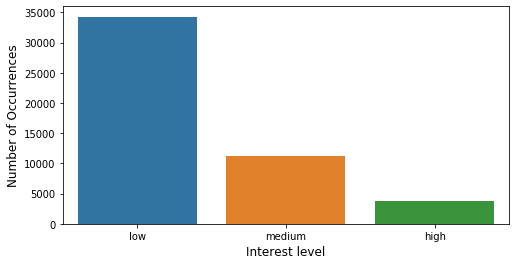

In [108]:
# Interest Levels
interest_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(interest_level.index, interest_level.values, order=['low', 'medium', 'high'])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

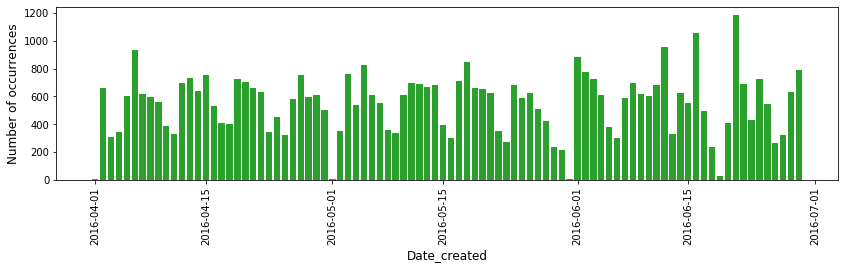

In [176]:
#detecting outliers in "created" => No outliers detected.
train_df["created"] = pd.to_datetime(train_df["created"])
train_df["dateCreation"] = train_df["created"].dt.date
number_occurrences = train_df["dateCreation"].value_counts()
#print (number_occurrences)

plt.figure(figsize=(14,7))
axis = plt.subplot(211)
axis.bar(number_occurrences.index, number_occurrences.values, color=color[2])
axis.xaxis_date()
plt.xticks(rotation='vertical')
plt.ylabel("Number of occurrences", fontsize=12)
plt.xlabel("Date_created", fontsize=12)
plt.show()


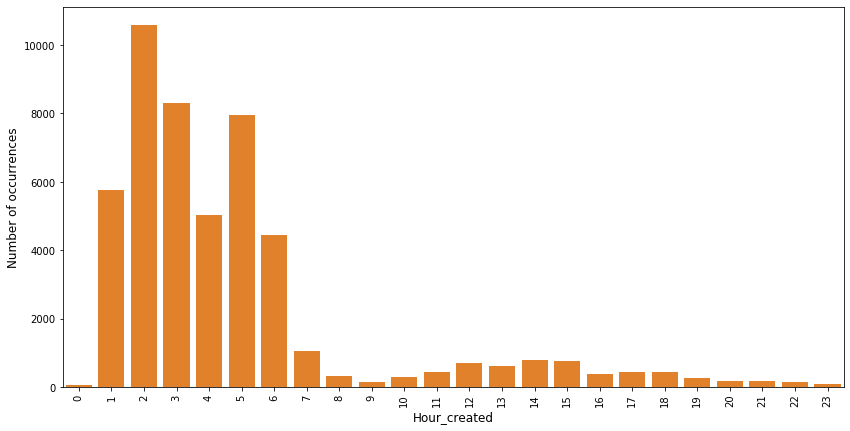

In [216]:
#checking for top 5 busiest hours
train_df["timeCreated"] = train_df["created"].dt.hour
number_occurrences = train_df["timeCreated"].value_counts()
#print (number_occurrences)
#The top 5 busiest hour is 2, 3, 5, 1, 4

plt.figure(figsize=(14,7))
sns.barplot(number_occurrences.index, number_occurrences.values, color=color[1])
plt.xticks(rotation='vertical')
plt.ylabel("Number of occurrences", fontsize=12)
plt.xlabel("Hour_created", fontsize=12)
plt.show()

In [55]:
def plot_values(col_name, xlabel, ylabel, color_no):
    num_col = train_df[col_name].value_counts()
    plt.figure(figsize=(8,4))
    sns.barplot(num_col.index, num_col.values, color=color[color_no])
    plt.ylabel(ylabel, fontsize=12)
    plt.xlabel(xlabel, fontsize=12)

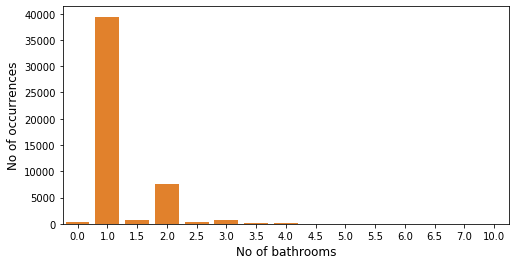

In [256]:
plot_values('bathrooms', 'No of bathrooms', 'No of occurrences', 1)
#print(train_df['bathrooms'].value_counts())

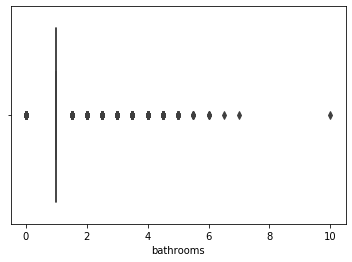

In [255]:
sns.boxplot(x=train_df['bathrooms'])

1    15752
2    14623
0     9475
3     7276
4     1929
5      247
6       46
8        2
7        2
Name: bedrooms, dtype: int64


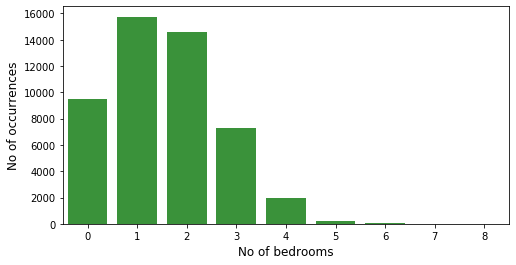

In [254]:
plot_values('bedrooms', 'No of bedrooms', 'No of occurrences', 2)
#print(train_df['bedrooms'].value_counts())

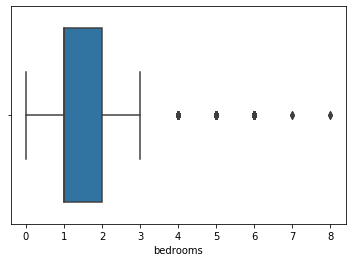

In [59]:
sns.boxplot(train_df['bedrooms'])

[8286, 41066]
[1, 32]


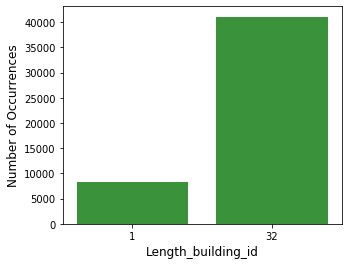

In [240]:
incorrect_build_id=train_df[train_df['building_id'].apply(len) == 1] #8286 occurrences
correct_build_id=train_df[train_df['building_id'].apply(len) == 32] #41066 id occurrences with length of 32
build_id_occurrences= [len(incorrect_build_id), len(correct_build_id)]
length_build_id= [1,32]
#print(build_id_occurrences)
#print(length_build_id)

#building_id = 0 has lenght 1. A real building_id has length 32
plt.figure(figsize=(5,4))
sns.barplot(length_build_id, build_id_occurrences, color=color[2])
plt.ylabel("Number of Occurrences", fontsize=12)
plt.xlabel("Length_building_id", fontsize=12)
plt.show()



In [261]:
#Exploring any outlier in the manger id
correct_manager_id=train_df[train_df['manager_id'].apply(len) == 32] #49352 id occurrences with length of 32, so no outlier
#print (len(correct_manager_id))

49352


In [274]:
#Exploring any outlier in the listing id
listing_id = train_df[train_df['listing_id'] == 0]#49352 id occurrences with length of 32, so no outlier
#print (correct_manager_id)

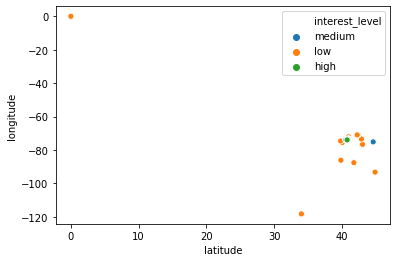

In [63]:
# Exploring lat / lon
sns.scatterplot(train_df['latitude'], train_df['longitude'], hue=train_df['interest_level'])

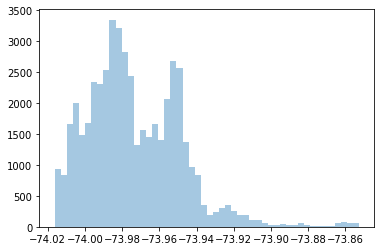

In [139]:
# Longitude Data 

lower_limit = np.percentile(train_df.longitude.values, 1) # Lower Limit = -74.0162, 534 values eliminated
upper_limit = np.percentile(train_df.longitude.values, 99) # Upper Limit = -73.8526, 494 values eliminated

long_data = train_df[(train_df['longitude'] <= upper_limit) & (train_df['longitude'] >= lower_limit)] 

# Histogram to show longitude
sns.distplot(long_data.longitude.values, bins=50, kde=False)

Text(0.5, 0, 'longitude')

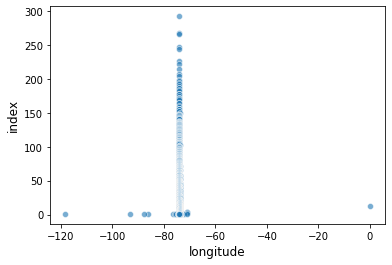

In [153]:
# Scatterplot to show outliers in longitude
num_col = train_df['longitude'].value_counts()
sns.scatterplot(num_col.index, num_col.values, alpha=0.6)
plt.ylabel('index', fontsize=12)
plt.xlabel('longitude', fontsize=12)

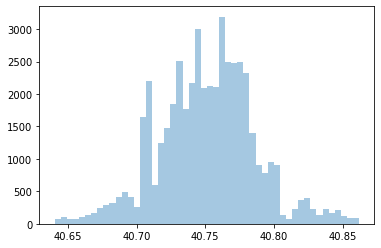

In [150]:
# Latitude Data 

lower_limit = np.percentile(train_df.latitude.values, 1) # Lower Limit = 40.6404, 491 values eliminated
upper_limit = np.percentile(train_df.latitude.values, 99) # Upper Limit = 40.8620, 494 values eliminated

long_data = train_df[(train_df['latitude'] <= upper_limit) & (train_df['latitude'] >= lower_limit)] 

# Histogram to show latitude
sns.distplot(long_data.latitude.values, bins=50, kde=False)

Text(0.5, 0, 'latitude')

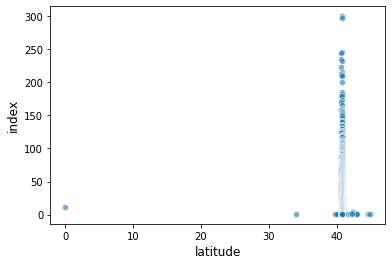

In [152]:
# Scatterplot to show outliers in latitude
num_col = train_df['latitude'].value_counts()
sns.scatterplot(num_col.index, num_col.values, alpha=0.6)
plt.ylabel('index', fontsize=12)
plt.xlabel('latitude', fontsize=12)

Text(0, 0.5, 'price')

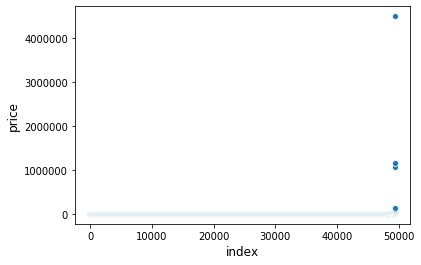

In [82]:
# Price 
x = range(train_df.shape[0]) # One point for each row
y = np.sort(train_df['price']) # Price sorted in assending order
# sns.scatterplot(range(train_df.shape[0]),np.sort(train_df['price']))
sns.scatterplot(x, y)
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)

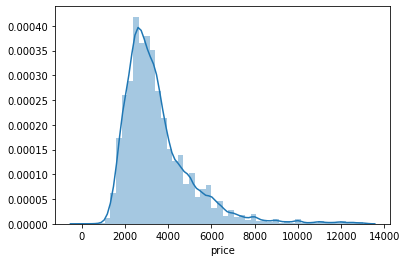

In [187]:
# Histogram for price
# Upper limit of the price range (13000)
# 481 listings have rent more than 13000 which are the outliers as seen in the previous plot
upper_lim = np.percentile(train_df.price.values, 99) 
price_data = train_df[train_df['price'] <= upper_lim]
sns.distplot(price_data['price'])